In [229]:
import pandas as pd
import numpy as np
from scipy import stats
!pip install --upgrade scipy

import missingno as msno

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading data
accepted = pd.read_csv('data/LC/Lending_Club_Accepted_2014_2018.csv')
rejected = pd.read_csv('data/LC/Lending_Club_Rejected_2014_2018.csv')
print(accepted.shape)
display(accepted.head())
print(rejected.shape)
display(rejected.head())

/Users/jeremylee/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (19,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(2029952, 151)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


(26132308, 9)


,Amount_Requested,Application_Date,Loan_Title,Risk_Score,Debt_to_Income_Ratio,Zip_Code,State,Employment_Length,Policy_Code
0,1000.0,2016-04-01,other,NaN,2.69%,331xx,FL,< 1 year,0.0
1,4000.0,2016-04-01,debt_consolidation,NaN,28.26%,834xx,ID,< 1 year,0.0
2,5000.0,2016-04-01,moving,NaN,-1%,648xx,MO,NaN,0.0
3,1000.0,2016-04-01,moving,628.0,21.43%,380xx,TN,< 1 year,0.0
4,3000.0,2016-04-01,Debt consolidation,NaN,8.49%,895xx,NV,2 years,2.0


In [12]:
count = 0
for col in accepted.columns:
    prop_missing = accepted[col].isna().mean()
    if prop_missing > 0.9:
        print(f'Column: {col}, Proportion missing: {prop_missing}')
        count += 1
print(f'{count} Columns with over 90% missing data')

Column: member_id, Proportion missing: 1.0
Column: desc, Proportion missing: 0.9924397227126552
Column: annual_inc_joint, Proportion missing: 0.9405355397566051
Column: dti_joint, Proportion missing: 0.9405375102465477
Column: verification_status_joint, Proportion missing: 0.9429887997351661
Column: revol_bal_joint, Proportion missing: 0.9467869190995649
Column: sec_app_fico_range_low, Proportion missing: 0.9467864264770792
Column: sec_app_fico_range_high, Proportion missing: 0.9467864264770792
Column: sec_app_earliest_cr_line, Proportion missing: 0.9467864264770792
Column: sec_app_inq_last_6mths, Proportion missing: 0.9467864264770792
Column: sec_app_mort_acc, Proportion missing: 0.9467864264770792
Column: sec_app_open_acc, Proportion missing: 0.9467864264770792
Column: sec_app_revol_util, Proportion missing: 0.9476913739832272
Column: sec_app_open_act_il, Proportion missing: 0.9467864264770792
Column: sec_app_num_rev_accts, Proportion missing: 0.9467864264770792
Column: sec_app_charg

In [10]:
for col in rejected.columns:
    print(f'Column: {col}, Proportion missing: {rejected[col].isna().mean()}')

Column: Amount_Requested, Proportion missing: 0.0
Column: Application_Date, Proportion missing: 0.0
Column: Loan_Title, Proportion missing: 4.932591487900724e-05
Column: Risk_Score, Proportion missing: 0.7060179682559994
Column: Debt_to_Income_Ratio, Proportion missing: 0.0
Column: Zip_Code, Proportion missing: 1.0370304834919289e-05
Column: State, Proportion missing: 3.826680750892726e-08
Column: Employment_Length, Proportion missing: 0.03566757287569089
Column: Policy_Code, Proportion missing: 3.512892929319523e-05


In [15]:
(accepted['loan_amnt'] == accepted['funded_amnt']).mean()

0.999998522132543

In [23]:
rejected['Application_Date']

0           2016-04-01
1           2016-04-01
2           2016-04-01
3           2016-04-01
4           2016-04-01
               ...    
26132303    2016-12-31
26132304    2016-12-31
26132305    2016-12-31
26132306    2016-12-31
26132307    2016-12-31
Name: Application_Date, Length: 26132308, dtype: object

In [103]:
stripped_accepted = accepted[['loan_amnt', 'issue_d', 'title', 'dti', 'zip_code', 'addr_state', 'emp_length', 'policy_code']]
stripped_accepted['accepted'] = 1
rejected.rename(columns={'Amount_Requested': 'loan_amnt',
                         'Application_Date': 'date',
                         'Loan_Title': 'title',
                         'Risk_Score': 'risk_score',
                         'Debt_to_Income_Ratio': 'dti',
                         'Zip_Code': 'zip_code',
                         'State': 'state',
                         'Employment_Length': 'emp_length',
                         'Policy_Code': 'policy_code'}, inplace=True)
rejected.drop(columns='risk_score', inplace=True)
rejected['accepted'] = 0
stripped_accepted.rename(columns={'issue_d': 'date',
                                  'addr_state': 'state'}, inplace=True)
full_data = pd.concat([stripped_accepted, rejected])
full_data.head()

,loan_amnt,date,title,dti,zip_code,state,emp_length,policy_code,accepted
0,3600.0,Dec-2015,Debt consolidation,5.91,190xx,PA,10+ years,1.0,1
1,24700.0,Dec-2015,Business,16.06,577xx,SD,10+ years,1.0,1
2,20000.0,Dec-2015,NaN,10.78,605xx,IL,10+ years,1.0,1
3,35000.0,Dec-2015,Debt consolidation,17.06,076xx,NJ,10+ years,1.0,1
4,10400.0,Dec-2015,Major purchase,25.37,174xx,PA,3 years,1.0,1


In [91]:
full_data['loan_amnt'].describe()

count    2.816226e+07
mean     1.328498e+04
std      1.488180e+04
min      0.000000e+00
25%      5.000000e+03
50%      1.000000e+04
75%      2.000000e+04
max      1.400000e+06
Name: loan_amnt, dtype: float64

In [104]:
full_data['title'] = full_data['title'].fillna('')
full_data['title'] = full_data['title'].str.lower()

In [93]:
full_data['title'].value_counts()

debt consolidation                       7537234
debt_consolidation                       5337722
other                                    4603278
credit card refinancing                  2755334
credit_card                              1217786
                                          ...   
hope two                                       1
ready                                          1
asking for help                                1
credit card refinancing/consolidation          1
debtc                                          1
Name: title, Length: 2141, dtype: int64

In [166]:
# Cleaning loan titles
loan_titles = ['Debt Consolidation', 'Credit Card', 'Home', 'Car', 'Medical', 'Business', 'Other']
full_data.loc[full_data['title'].str.contains('credit'), 'title'] = 'Credit Card'
full_data.loc[full_data['title'].str.contains('cc'), 'title'] = 'Credit Card'
full_data.loc[full_data['title'].str.contains('debt'), 'title'] = 'Debt Consolidation'
full_data.loc[full_data['title'].str.contains('consolidation'), 'title'] = 'Debt Consolidation'
full_data.loc[full_data['title'].str.contains('consolidate'), 'title'] = 'Debt Consolidation'
full_data.loc[full_data['title'].str.contains('payoff'), 'title'] = 'Debt Consolidation'
full_data.loc[full_data['title'].str.contains('pay off'), 'title'] = 'Debt Consolidation'
full_data.loc[full_data['title'].str.contains('refinance'), 'title'] = 'Debt Consolidation'
full_data.loc[full_data['title'].str.contains('home'), 'title'] = 'Home'
full_data.loc[full_data['title'].str.contains('house'), 'title'] = 'Home'
full_data.loc[full_data['title'].str.contains('moving'), 'title'] = 'Home'
full_data.loc[full_data['title'].str.contains('car'), 'title'] = 'Car'
full_data.loc[full_data['title'].str.contains('medical'), 'title'] = 'Medical'
full_data.loc[full_data['title'].str.contains('business'), 'title'] = 'Business'

In [169]:
full_data.loc[~full_data['title'].isin(loan_titles), 'title'] = 'Other'

In [115]:
# Standardizing dti
full_data['dti'] = full_data['dti'].astype('str').str.replace('%', '').astype('float')

In [116]:
full_data.head()

,loan_amnt,date,title,dti,zip_code,state,emp_length,policy_code,accepted
0,3600.0,Dec-2015,Debt Consolidation,5.91,190xx,PA,10+ years,1.0,1
1,24700.0,Dec-2015,Business,16.06,577xx,SD,10+ years,1.0,1
2,20000.0,Dec-2015,,10.78,605xx,IL,10+ years,1.0,1
3,35000.0,Dec-2015,Debt Consolidation,17.06,076xx,NJ,10+ years,1.0,1
4,10400.0,Dec-2015,major purchase,25.37,174xx,PA,3 years,1.0,1


In [126]:
full_data = full_data[~full_data['dti'].isna()]

In [127]:
shapiro_test = stats.shapiro(full_data['dti'].values)
print(shapiro_test.statistic)
print(shapiro_test.pvalue)

0.010423481464385986
0.0


In [170]:
full_data['date'] = pd.to_datetime(full_data['date'])
full_data['date'] = full_data['date'].dt.strftime('%Y-%m')
accepted_full_data = full_data.loc[full_data['accepted'] == 1]
rejected_full_data = full_data.loc[full_data['accepted'] == 0]

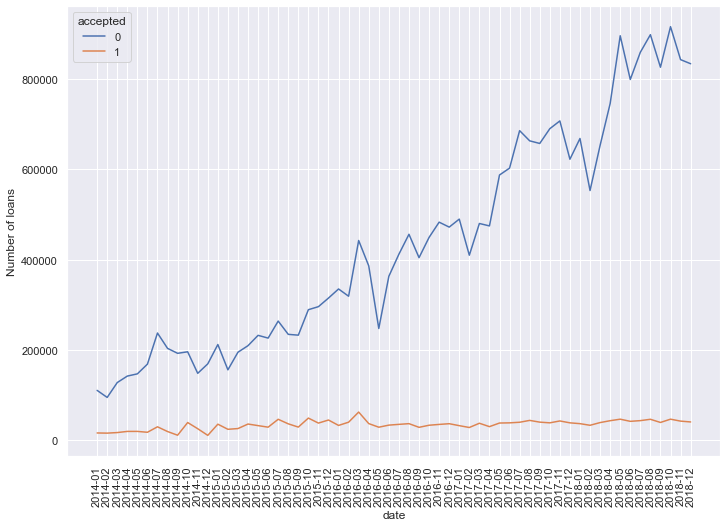

In [162]:
p = sns.lineplot(data=full_data.groupby(['date', 'accepted']).count().reset_index(), x='date', y='title', hue='accepted')
p.set_ylabel("Number of loans")
plt.xticks(rotation=90)
p

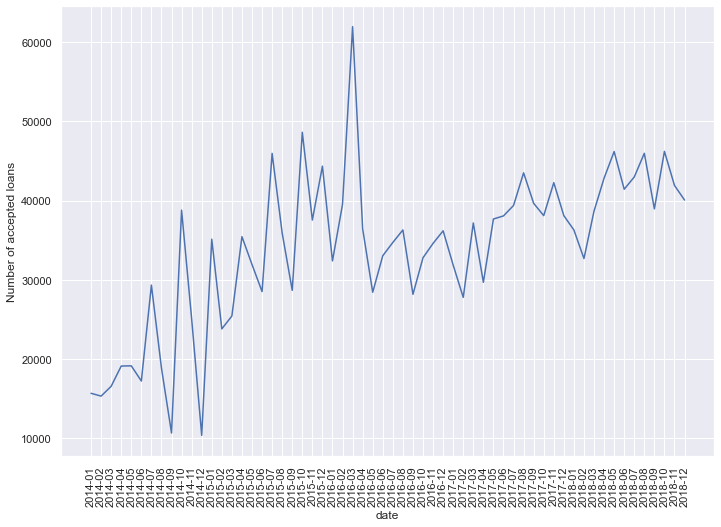

In [160]:
p = sns.lineplot(data=accepted_full_data.groupby('date').count().reset_index(), x='date', y='title')
p.set_ylabel("Number of accepted loans")
plt.xticks(rotation=90)
p

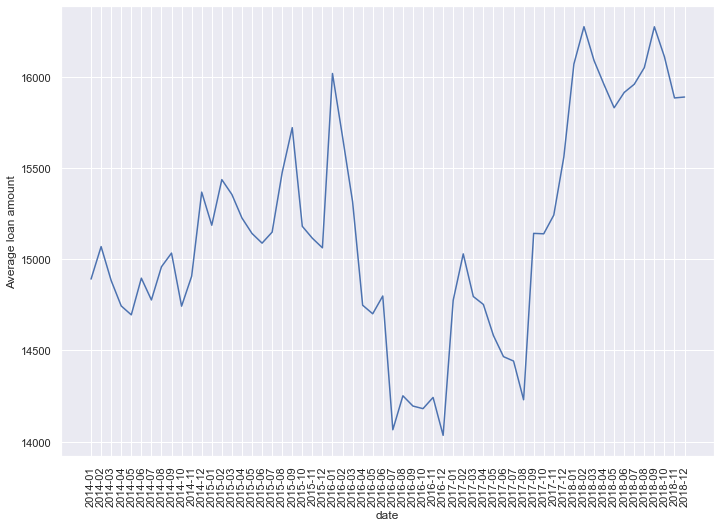

In [161]:
p = sns.lineplot(data=accepted_full_data.groupby('date').mean().reset_index(), x='date', y='loan_amnt')
p.set_ylabel("Average loan amount")
plt.xticks(rotation=90)
p

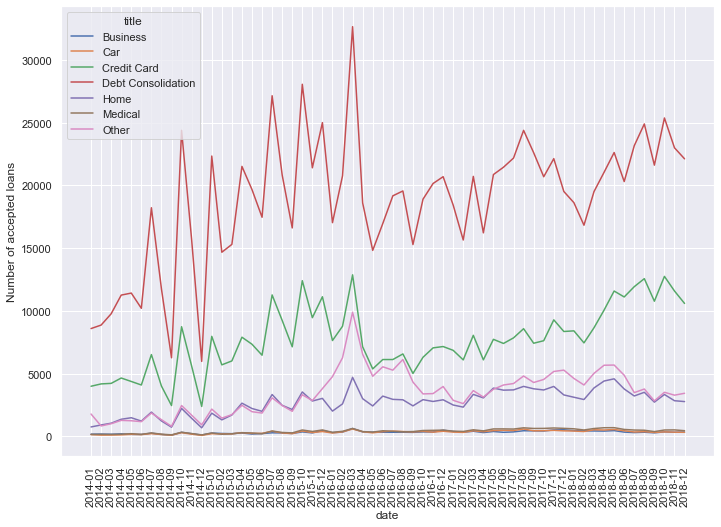

In [172]:
p = sns.lineplot(data=accepted_full_data.groupby(['date', 'title']).count().reset_index(), x='date', y='accepted', hue='title')
p.set_ylabel("Number of accepted loans")
plt.xticks(rotation=90)
p

In [174]:
loan_count = full_data.groupby('date').count().reset_index()[['date', 'title']]
loan_count['prop_accepted'] = accepted_full_data.groupby('date').count().reset_index()['title'] / loan_count['title']
loan_count.head()

,date,title,prop_accepted
0,2014-01,125691,0.124337
1,2014-02,109690,0.139201
2,2014-03,143907,0.114748
3,2014-04,160829,0.118579
4,2014-05,165800,0.115193


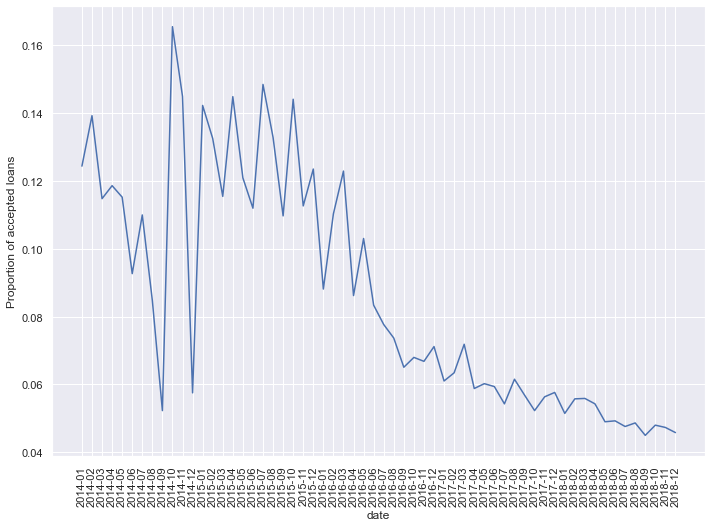

In [175]:
p = sns.lineplot(data=loan_count, x='date', y='prop_accepted')
p.set_ylabel("Proportion of accepted loans")
plt.xticks(rotation=90)
p

In [178]:
full_data['post_resignation'] = 1
full_data.loc[full_data['date'] < '2016-05', 'post_resignation'] = 0
full_data.head()

,loan_amnt,date,title,dti,zip_code,state,emp_length,policy_code,accepted,post_resignation
0,3600.0,2015-12,Debt Consolidation,5.91,190xx,PA,10+ years,1.0,1,0
1,24700.0,2015-12,Business,16.06,577xx,SD,10+ years,1.0,1,0
2,20000.0,2015-12,Other,10.78,605xx,IL,10+ years,1.0,1,0
3,35000.0,2015-12,Debt Consolidation,17.06,076xx,NJ,10+ years,1.0,1,0
4,10400.0,2015-12,Other,25.37,174xx,PA,3 years,1.0,1,0


In [179]:
accepted_full_data = full_data[full_data['accepted'] == 1]

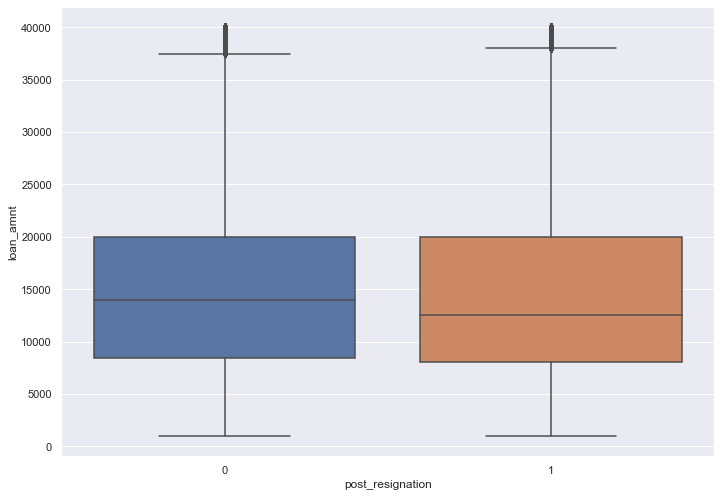

In [181]:
sns.boxplot(data=accepted_full_data, x='post_resignation', y='loan_amnt')

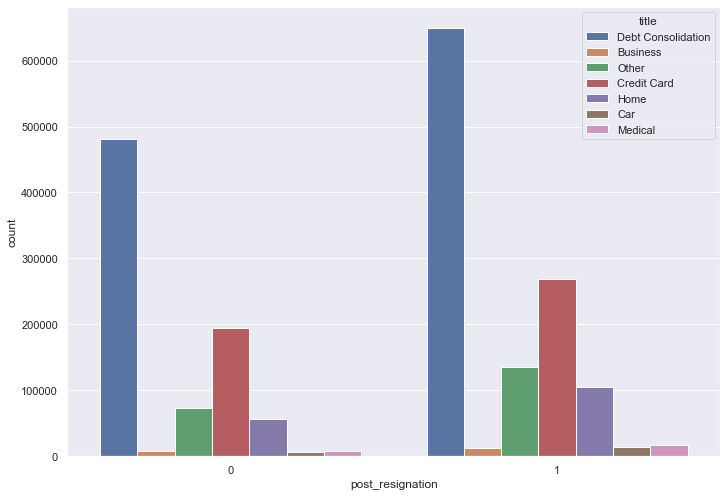

In [182]:
sns.countplot(data=accepted_full_data, x='post_resignation', hue='title')

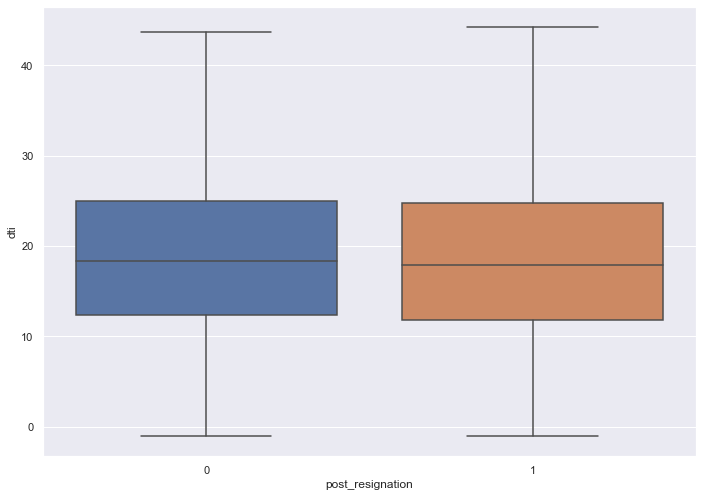

In [185]:
sns.boxplot(data=accepted_full_data, x='post_resignation', y='dti', showfliers = False)

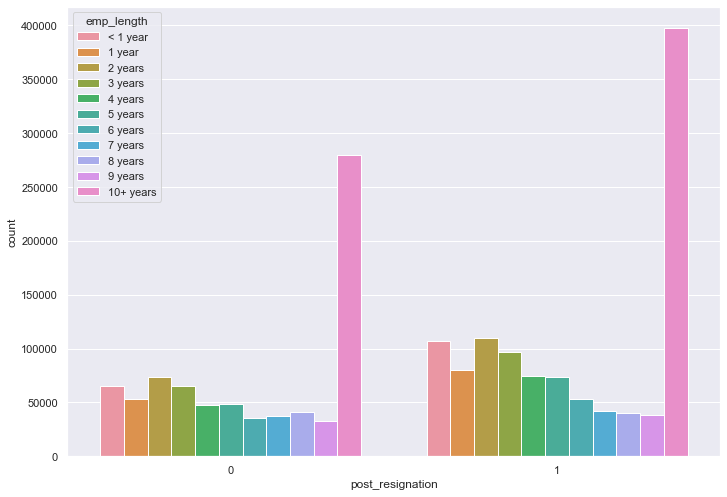

In [195]:
sorted_emp_length = ['< 1 year', '1 year', '2 years', '3 years', '4 years',
                     '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
sns.countplot(data=accepted_full_data, x='post_resignation', hue='emp_length', hue_order=sorted_emp_length)

In [216]:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500)
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=0.17903319445579818, pvalue=0.8579479760333659)

In [230]:
sample1 = accepted_full_data.loc[accepted_full_data['post_resignation'] == 1, 'loan_amnt']
sample2 = accepted_full_data.loc[accepted_full_data['post_resignation'] == 0, 'loan_amnt']
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=2.6826611037120687, pvalue=0.0073039555049220035)

In [236]:
sample1 = accepted_full_data.loc[accepted_full_data['post_resignation'] == 1, 'dti']
sample2 = accepted_full_data.loc[accepted_full_data['post_resignation'] == 0, 'dti']
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=16.344413671125686, pvalue=4.8097793030929555e-60)

In [253]:
sample1 = accepted_full_data.loc[accepted_full_data['post_resignation'] == 1, 'title'].value_counts()[loan_titles].values
sample2 = accepted_full_data.loc[accepted_full_data['post_resignation'] == 0, 'title'].value_counts()[loan_titles].values
stats.chisquare(sample1, f_exp=sample2)

Power_divergenceResult(statistic=201876.91583388948, pvalue=0.0)

In [259]:
pd.crosstab(accepted_full_data['title'], accepted_full_data['post_resignation'])

post_resignation,0,1
title,,
Business,7274,12402
Car,6951,13343
Credit Card,193759,268599
Debt Consolidation,481318,649275
Home,56552,105035
Medical,8016,16920
Other,73146,135651


In [260]:
stats.chi2_contingency(pd.crosstab(accepted_full_data['post_resignation'], accepted_full_data['title']).values)

(8086.607970152719,
 0.0,
 6,
 array([[  8022.89610357,   8274.88582668, 188526.64142378,
         460999.70392473,  65887.15758729,  10167.66300257,
          85137.05213138],
        [ 11653.10389643,  12019.11417332, 273831.35857622,
         669593.29607527,  95699.84241271,  14768.33699743,
         123659.94786862]]))

In [255]:
sample2

array([481318, 193759,  56552,   6951,   8016,   7274,  73146])

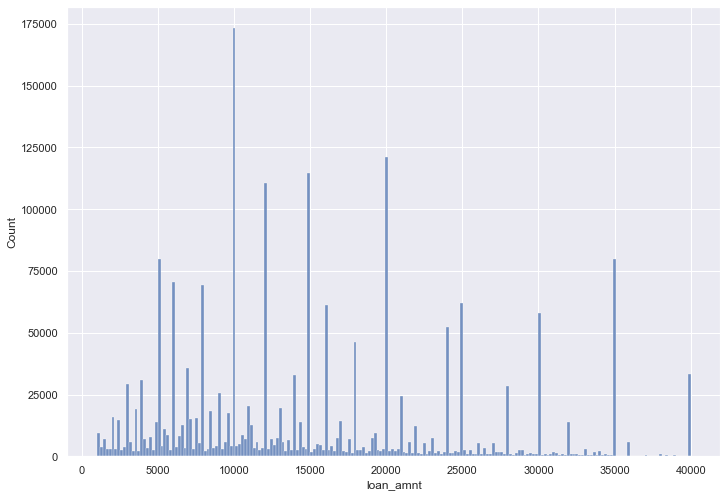

In [197]:
sns.histplot(accepted['loan_amnt'])

In [132]:
stats.ttest_ind(accepted_full_data['dti'], 
                rejected_full_data.sample(accepted_full_data.shape[0])['dti'])

count    2.028241e+06
mean     1.910218e+01
std      1.472265e+01
min     -1.000000e+00
25%      1.204000e+01
50%      1.805000e+01
75%      2.484000e+01
max      9.990000e+02
Name: dti, dtype: float64